In [1]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(tidyverse)
library(RColorBrewer)
#library(ggeasy)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
TE_Bed <- read.delim(file = 'd6_H3K27ac_LTRoverlap.bed', header = F)
colnames <- as.list(c("chrm","start","end","RPKM_H3K27ac","TE_Chrom", "TE_Start", "TE_End", "Subfamily", "TE_Length", "Strand", "Family", "Overlap"))
colnames(TE_Bed) <- colnames
head(TE_Bed)

,chrm,start,end,RPKM_H3K27ac,TE_Chrom,TE_Start,TE_End,Subfamily,TE_Length,Strand,Family,Overlap
,<chr>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>
1,8,3050001,3050186,-0.41201696,8,3050001,3050186,MurERV4_19-int,186,+,ERVK,185
2,8,3050386,3050605,0.07355288,8,3050386,3050605,RMER5,220,+,ERV1,219
3,8,3050606,3050731,0.00000000,8,3050606,3050731,ORR1E,126,+,ERVL-MaLR,125
4,8,3050793,3051009,-1.45659489,8,3050793,3051009,RLTR14-int,217,+,ERV1,216
5,8,3051032,3051407,-0.29809136,8,3051032,3051407,RLTR14,376,+,ERV1,375
6,8,3052536,3052595,0.51129662,8,3052536,3052595,ORR1E,60,+,ERVL-MaLR,59


In [3]:
keep <- c(4,8,11)
TE_melt <- TE_Bed[,keep]
reshape2::melt(TE_melt)
head(TE_melt)
LTR <- c("ERVK", "ERVL", "ERVL-MaLR", "ERV1", "Gypsy", "LTR")
LTR_keep <- filter(TE_melt, Family %in% LTR)
LTR_keep

Using Subfamily, Family as id variables



Subfamily,Family,variable,value
<chr>,<chr>,<fct>,<dbl>
MurERV4_19-int,ERVK,RPKM_H3K27ac,-0.412016962
RMER5,ERV1,RPKM_H3K27ac,0.073552882
ORR1E,ERVL-MaLR,RPKM_H3K27ac,0.000000000
RLTR14-int,ERV1,RPKM_H3K27ac,-1.456594892
RLTR14,ERV1,RPKM_H3K27ac,-0.298091362
ORR1E,ERVL-MaLR,RPKM_H3K27ac,0.511296617
ORR1E,ERVL-MaLR,RPKM_H3K27ac,-1.685796315
RLTR11A,ERVK,RPKM_H3K27ac,-3.053981340
ERVB5_1-LTR_MM,ERVK,RPKM_H3K27ac,-0.430233256


,RPKM_H3K27ac,Subfamily,Family
,<dbl>,<chr>,<chr>
1,-0.41201696,MurERV4_19-int,ERVK
2,0.07355288,RMER5,ERV1
3,0.00000000,ORR1E,ERVL-MaLR
4,-1.45659489,RLTR14-int,ERV1
5,-0.29809136,RLTR14,ERV1
6,0.51129662,ORR1E,ERVL-MaLR


RPKM_H3K27ac,Subfamily,Family
<dbl>,<chr>,<chr>
-0.412016962,MurERV4_19-int,ERVK
0.073552882,RMER5,ERV1
0.000000000,ORR1E,ERVL-MaLR
-1.456594892,RLTR14-int,ERV1
-0.298091362,RLTR14,ERV1
0.511296617,ORR1E,ERVL-MaLR
-1.685796315,ORR1E,ERVL-MaLR
-3.053981340,RLTR11A,ERVK
-0.430233256,ERVB5_1-LTR_MM,ERVK


In [5]:
LTRs <- as.list(unique(LTR_keep$Subfamily))
head(LTRs)

[[1]]
[1] "MurERV4_19-int"

[[2]]
[1] "RMER5"

[[3]]
[1] "ORR1E"

[[4]]
[1] "RLTR14-int"

[[5]]
[1] "RLTR14"

[[6]]
[1] "RLTR11A"

In [6]:
LTR_stats <- data.frame(matrix(ncol = 3, nrow = 630))
colnames <- as.list(c("Subfamily","Mean","Median"))
colnames(LTR_stats) <- colnames
LTR_stats$Subfamily <- LTRs
head(LTR_stats)

,Subfamily,Mean,Median
,<list>,<lgl>,<lgl>
1,MurERV4_19-int,NA,NA
2,RMER5,NA,NA
3,ORR1E,NA,NA
4,RLTR14-int,NA,NA
5,RLTR14,NA,NA
6,RLTR11A,NA,NA


In [7]:
LTR_mean <- aggregate(LTR_keep$RPKM_H3K27ac, list(LTR_keep$Subfamily), FUN=mean)
colnames <- as.list(c("Subfamily", "Mean"))
colnames(LTR_mean) <- colnames
LTR_median <- aggregate(LTR_keep$RPKM_H3K27ac, list(LTR_keep$Subfamily), FUN=median)
colnames <- as.list(c("Subfamily", "Median"))
colnames(LTR_median) <- colnames
head(LTR_mean)
head(LTR_median)

,Subfamily,Mean
,<chr>,<dbl>
1,BGLII,2.58104098
2,BGLII_A,1.13904047
3,BGLII_B,0.39112537
4,BGLII_B2,1.02466315
5,BGLII_C,-0.26408721
6,BGLII_Mur,0.03630242


,Subfamily,Median
,<chr>,<dbl>
1,BGLII,0.4709912
2,BGLII_A,-0.1737271
3,BGLII_B,-0.4752432
4,BGLII_B2,-0.3691125
5,BGLII_C,-0.6767848
6,BGLII_Mur,-0.6570215


In [8]:
LTR_stats <- merge(x = LTR_mean, y= LTR_median, by = "Subfamily")
colnames <- as.list(c("Subfamily", "Mean", "Median"))
colnames(LTR_stats) <- colnames
head(LTR_stats)

,Subfamily,Mean,Median
,<chr>,<dbl>,<dbl>
1,BGLII,2.58104098,0.4709912
2,BGLII_A,1.13904047,-0.1737271
3,BGLII_B,0.39112537,-0.4752432
4,BGLII_B2,1.02466315,-0.3691125
5,BGLII_C,-0.26408721,-0.6767848
6,BGLII_Mur,0.03630242,-0.6570215


In [9]:
LTR_stats <- LTR_stats[order(-LTR_stats$Mean),]
head(LTR_stats)

,Subfamily,Mean,Median
,<chr>,<dbl>,<dbl>
11,ERVB2_1A-I_MM,15.906430,2.006706
428,RLTR13D6,15.646715,5.543496
429,RLTR13E,13.058486,4.466922
566,RLTR9D2,10.711276,3.183305
431,RLTR13G,8.866653,3.714875
565,RLTR9D,6.981226,2.152433


In [10]:
LTR_tops <- filter(LTR_stats, Mean >= 5)
LTR_order <- as.factor(LTR_tops$Subfamily)
LTR_tops$Subfamily <- as.list(LTR_tops$Subfamily)
print(LTR_tops)
LTR_sig <- as.list(LTR_tops$Subfamily)
length(LTR_sig)
#
RLTR_stats <- LTR_stats %>% filter(str_detect(Subfamily, 'RLTR'))
RLTR_tops <-  top_n(RLTR_stats, 10, Mean)    
RLTR_order <- as.factor(RLTR_tops$Subfamily)
RLTR_tops$Subfamily <- as.list(RLTR_tops$Subfamily)
print(RLTR_tops)
RLTR_sig <- as.list(RLTR_tops$Subfamily)
length(RLTR_sig)

         Subfamily      Mean    Median
1    ERVB2_1A-I_MM 15.906430 2.0067056
2         RLTR13D6 15.646715 5.5434960
3          RLTR13E 13.058486 4.4669224
4          RLTR9D2 10.711276 3.1833055
5          RLTR13G  8.866653 3.7148753
6           RLTR9D  6.981226 2.1524332
7           RLTR9E  6.528399 1.6332676
8   ERVB7_4-LTR_MM  6.240763 2.5989824
9        MMETn-int  5.818040 1.8927403
10 ERVB4_1C-LTR_Mm  5.817534 0.8421476
11         RLTR41C  5.756289 1.2068241
12        RLTR13D4  5.234900 1.0324463
13          LTRIS2  5.226742 2.7565511
14          LTRIS3  5.135076 2.1703660
15      ETnERV-int  5.115311 0.8748552


[1] 15

    Subfamily      Mean     Median
1    RLTR13D6 15.646715 5.54349604
2     RLTR13E 13.058486 4.46692241
3     RLTR9D2 10.711276 3.18330549
4     RLTR13G  8.866653 3.71487527
5      RLTR9D  6.981226 2.15243318
6      RLTR9E  6.528399 1.63326762
7     RLTR41C  5.756289 1.20682413
8    RLTR13D4  5.234900 1.03244631
9  RLTRETN_Mm  4.436680 1.66430997
10   RLTR13C1  4.235576 0.02306585


[1] 10

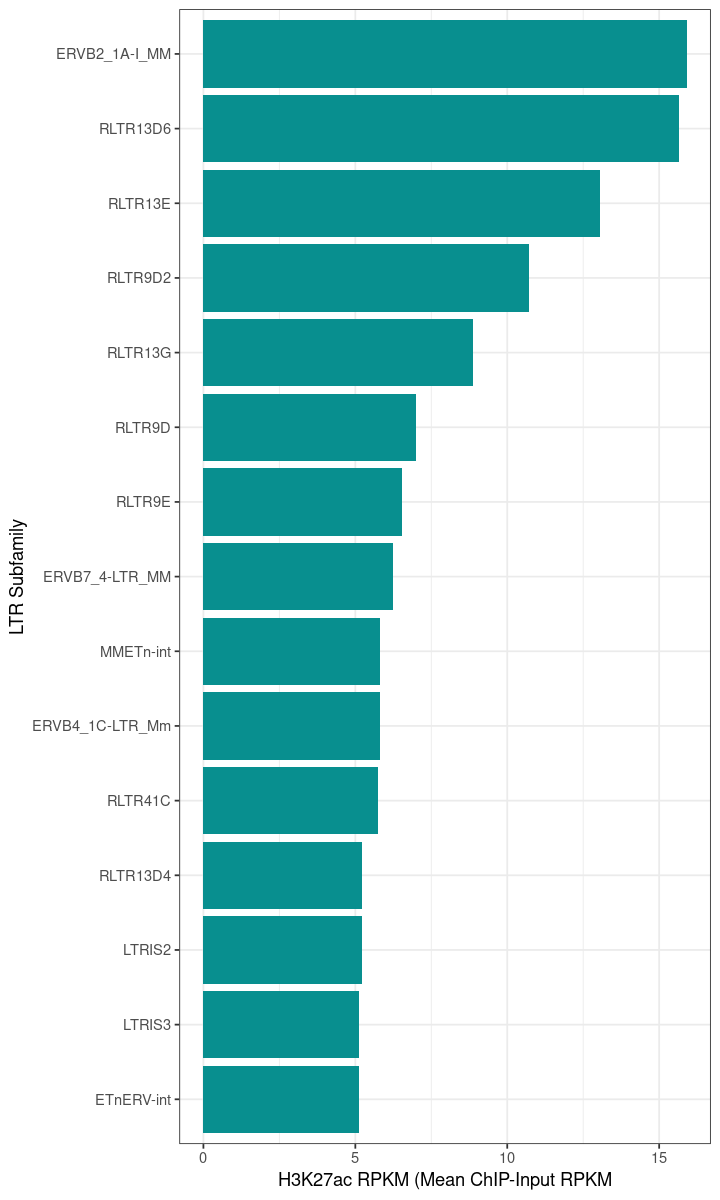

In [11]:
options(repr.plot.width=6, repr.plot.height=10)
plotlist <- LTR_tops[,1:2]
plotlist$Subfamily <- as.character(plotlist$Subfamily)
#
LTR_ggplot <- ggplot(plotlist, aes(x = reorder(Subfamily, Mean), y = Mean)) + geom_bar(stat = "identity", fill = "#088F8F") + coord_flip() + theme_bw() + xlab(label = "LTR Subfamily") + ylab(label = "H3K27ac RPKM (Mean ChIP-Input RPKM")
LTR_ggplot

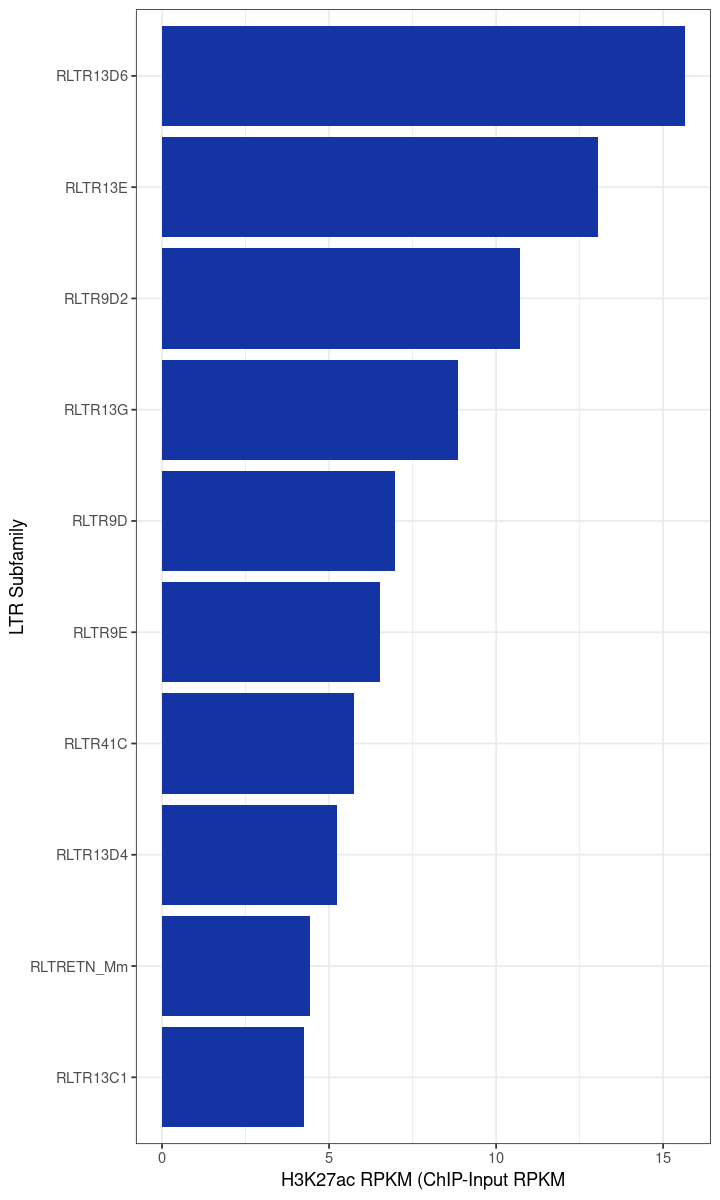

In [12]:
options(repr.plot.width=6, repr.plot.height=10)
#
RLTR_plotlist <- RLTR_tops[,1:2]
RLTR_plotlist$Subfamily <- as.character(RLTR_plotlist$Subfamily)
#
RLTR_ggplot <- ggplot(RLTR_plotlist, aes(x = reorder(Subfamily, Mean), y = Mean)) + geom_bar(stat = "identity", fill = "#1434A4") + coord_flip() + theme_bw() + xlab(label = "LTR Subfamily") + ylab(label = "H3K27ac RPKM (ChIP-Input RPKM")
RLTR_ggplot

In [13]:
write.table(plotlist, file = 'All_family_enrich_supp2.tsv', sep = '\t', row.names = F, col.names = T, quote = F)
write.table(RLTR_plotlist, file = 'RLTR_family_enrich_supp2.tsv', sep = '\t', row.names = F, col.names = T, quote = F)

In [14]:
pdf(file = 'noshuffle_RLTR_subset_H3K27ac_meanRPKM.pdf', height = 10, width = 6)
RLTR_ggplot
dev.off()
#
pdf(file = 'noshuffle_All_LTR_H3K27ac_meanRPKM.pdf', height = 10, width = 6)
LTR_ggplot
dev.off()